#### Used packages

- qiskit==0.38.0
- matplotlib==3.7.0
- matplotlib-inline==0.1.6
- pylatexenc==2.10


In [15]:
import warnings
import os
import sys
warnings.filterwarnings('ignore')
from qiskit import *

In [18]:
# create 2 qubit quantum register
qr = QuantumRegister(2)
# create 2 classical bits to hold measurement results
cr = ClassicalRegister(2)
print(qr)
print(cr)

QuantumRegister(2, 'q2')
ClassicalRegister(2, 'c2')


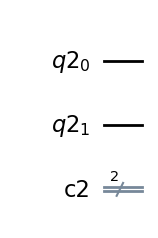

In [19]:
# creating a circuit using classical and quantum registers
circuit = QuantumCircuit(qr, cr)
# visualize quantum circuit
%matplotlib inline
circuit.draw(output='mpl')

In [21]:
# in order to create Entanglement, 1st step is to apply Hadamard gate on one of the qbits
circuit.h(qr[0])

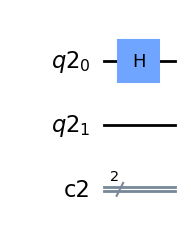

In [22]:
%matplotlib inline
circuit.draw(output='mpl')

In [23]:
## now 2 qubit operation of cx (controlled x gate) 
## it is similar to classical if
## control qubit is the first, and the target of the operation is second qubit
circuit.cx(qr[0], qr[1])

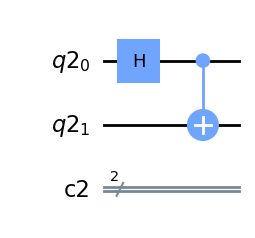

In [24]:
circuit.draw(output='mpl')

In [25]:
 ## with this 2 operation, we aim to generate entanglement between 2 qubits
## now we measure the qbits and store the results in classical bits
circuit.measure(qr,cr)

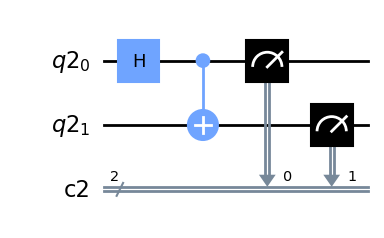

In [26]:

circuit.draw(output='mpl')

In [27]:
## now circuit is ready to run on the classical machine
## to use the quantum simulator on classical machine, we use aer component of qisit
## name of the simulator is qasm_simulator (quantum assembly language )
simulator = Aer.get_backend('qasm_simulator')

In [28]:
## imported the simulator, now we can execute
result = execute(circuit, backend = simulator).result()

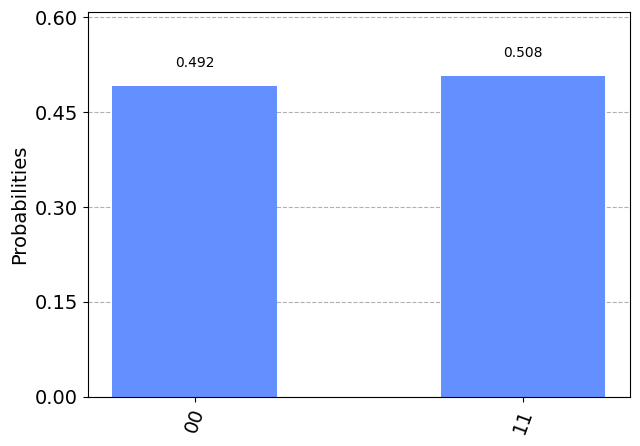

In [30]:
## visualise the result using qiskit plot histogram
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

### Now run on real IBM quantum device
- We expect more base states with lower probability amplitudes due to quantum noise
- reading the apikey which is locally stored

In [31]:
env = '../ibm-apikey.env'

with open(env, 'r') as file:
    data = file.read().replace('\n', '')

In [32]:
# connect IBM account

from qiskit import IBMQ
IBMQ.save_account(data, overwrite=True)
IBMQ.load_account()
## get account provider
provider = IBMQ.get_provider('ibm-q')


In [34]:
## get available machine
qcomp = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)[0]

print(qcomp)

ibmq_lima


In [35]:
## define job which is to run in ibm quantum cloud
job = execute(circuit, backend=qcomp)
## import qiskit job monitor to track the queue of our reques in public quantum device
from qiskit.tools.monitor import job_monitor
job_monitor(job)
print('jobid:',job.job_id())

Job Status: job has successfully run
jobid: 63ebfdeb17b7eddc0524ea47


In [36]:
# get job result
#
result = job.result()

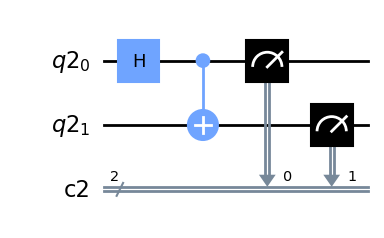

In [40]:
circuit.draw(output='mpl')

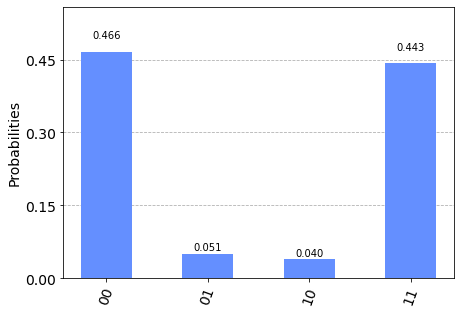

In [56]:
# This one ran on ibmq_melburne (Jan 31, 2021, before it was retired)
#
plot_histogram(result.get_counts(circuit))

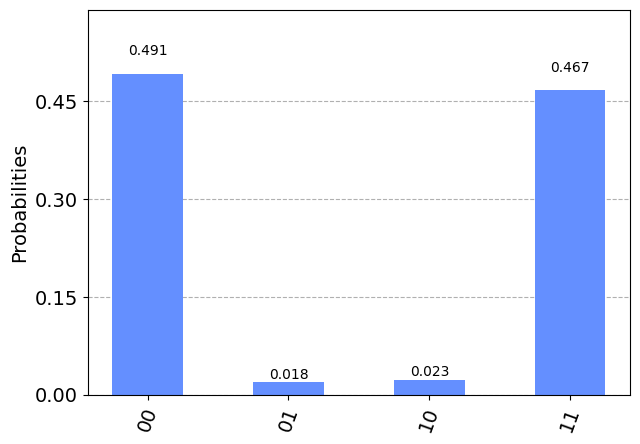

In [38]:
# This one ran on ibmq_lima (14.02.2023)
# Shows less noise implications
plot_histogram(result.get_counts(circuit))

In [57]:
## real quantum device generates quantum noises thus perturbates the qubit system
## those perturbations yields 2 more base states which has lover probability amplitudes

#### Summary

- used 2 quantum registers to save the qubit states
- used 2 classical registers to save the measurement results of those qubit states
- used one 1 Hadamard operation times 1 CX gate operation upon quibits to attain the entagled states
- perform measure to collaps to states of cubits to basis states with corresponding probabilities
- observed that 11 and 00 states are almost 50% probable
- resulting states of 01 and 10 are created due to imperfection of the hardware environment, noise and temperature etc.

